Here I'll implement some plotting in Python using some provided data. This exercise is based on material from the course AY250 at UC Berkeley.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas
from matplotlib.legend_handler import HandlerPatch


In [2]:
data2 = pandas.read_csv('master_df_bloom_figure.csv')
print(data2)

      year           type       gpw
0     2008     NVIDIA GPU       NaN
1     2008     NVIDIA GPU       NaN
2     2008     NVIDIA GPU       NaN
3     2007     NVIDIA GPU  0.550000
4     2007     NVIDIA GPU  1.075000
5     2007     NVIDIA GPU  1.320000
6     2009     NVIDIA GPU  1.220000
7     2007     NVIDIA GPU  0.955556
8     2007     NVIDIA GPU  2.404255
9     2007     NVIDIA GPU  2.404255
10    2007     NVIDIA GPU  1.957746
11    2008     NVIDIA GPU  3.771429
12    2007     NVIDIA GPU  2.369863
13    2007     NVIDIA GPU  2.660000
14    2007     NVIDIA GPU  4.800000
15    2007     NVIDIA GPU  4.622222
16    2006     NVIDIA GPU       NaN
17    2007     NVIDIA GPU  3.291429
18    2008     NVIDIA GPU       NaN
19    2008     NVIDIA GPU  5.600000
20    2008     NVIDIA GPU  1.248000
21    2008     NVIDIA GPU       NaN
22    2008     NVIDIA GPU  1.344000
23    2008     NVIDIA GPU  2.688000
24    2008     NVIDIA GPU       NaN
25    2008     NVIDIA GPU  4.714286
26    2008     NVIDIA GPU  2

In [3]:
NVGdf = data2.loc[data2['type']=='NVIDIA GPU']
NVGdf = NVGdf[np.isfinite(NVGdf['gpw'])]
NVGlist = []
print(NVGdf)

     year        type        gpw
3    2007  NVIDIA GPU   0.550000
4    2007  NVIDIA GPU   1.075000
5    2007  NVIDIA GPU   1.320000
6    2009  NVIDIA GPU   1.220000
7    2007  NVIDIA GPU   0.955556
8    2007  NVIDIA GPU   2.404255
9    2007  NVIDIA GPU   2.404255
10   2007  NVIDIA GPU   1.957746
11   2008  NVIDIA GPU   3.771429
12   2007  NVIDIA GPU   2.369863
13   2007  NVIDIA GPU   2.660000
14   2007  NVIDIA GPU   4.800000
15   2007  NVIDIA GPU   4.622222
17   2007  NVIDIA GPU   3.291429
19   2008  NVIDIA GPU   5.600000
20   2008  NVIDIA GPU   1.248000
22   2008  NVIDIA GPU   1.344000
23   2008  NVIDIA GPU   2.688000
25   2008  NVIDIA GPU   4.714286
26   2008  NVIDIA GPU   2.600000
28   2008  NVIDIA GPU   3.284211
29   2009  NVIDIA GPU   6.160000
31   2008  NVIDIA GPU   4.628571
32   2008  NVIDIA GPU   5.000000
34   2009  NVIDIA GPU   0.960000
35   2009  NVIDIA GPU   2.688000
36   2009  NVIDIA GPU   2.400000
37   2009  NVIDIA GPU   2.971429
38   2009  NVIDIA GPU   5.000000
39   2009 

In [4]:
NVGdf = data2.loc[data2['type']=='NVIDIA GPU']
NVGdf = NVGdf[np.isfinite(NVGdf['gpw'])]
NVGlist = []
print(NVGdf)


NVGyrs = np.sort(NVGdf.year.unique())
for yr in NVGyrs:
    NVGlistnew = NVGdf.loc[NVGdf['year']==yr]
    NVGlist.append(NVGlistnew.as_matrix(columns=[NVGlistnew.columns[2]]))
# print(NVGlist)
NVGboxdat = np.array(NVGlist)
# print(NVGboxdat)
x_NVG = np.arange(2007, 2017)-0.2



     year        type        gpw
3    2007  NVIDIA GPU   0.550000
4    2007  NVIDIA GPU   1.075000
5    2007  NVIDIA GPU   1.320000
6    2009  NVIDIA GPU   1.220000
7    2007  NVIDIA GPU   0.955556
8    2007  NVIDIA GPU   2.404255
9    2007  NVIDIA GPU   2.404255
10   2007  NVIDIA GPU   1.957746
11   2008  NVIDIA GPU   3.771429
12   2007  NVIDIA GPU   2.369863
13   2007  NVIDIA GPU   2.660000
14   2007  NVIDIA GPU   4.800000
15   2007  NVIDIA GPU   4.622222
17   2007  NVIDIA GPU   3.291429
19   2008  NVIDIA GPU   5.600000
20   2008  NVIDIA GPU   1.248000
22   2008  NVIDIA GPU   1.344000
23   2008  NVIDIA GPU   2.688000
25   2008  NVIDIA GPU   4.714286
26   2008  NVIDIA GPU   2.600000
28   2008  NVIDIA GPU   3.284211
29   2009  NVIDIA GPU   6.160000
31   2008  NVIDIA GPU   4.628571
32   2008  NVIDIA GPU   5.000000
34   2009  NVIDIA GPU   0.960000
35   2009  NVIDIA GPU   2.688000
36   2009  NVIDIA GPU   2.400000
37   2009  NVIDIA GPU   2.971429
38   2009  NVIDIA GPU   5.000000
39   2009 

In [5]:
scdf = data2.loc[data2['type']=='supercomputer']
scdf = scdf[np.isfinite(scdf['gpw'])]
sclist = []
# print(scdf)
scyrs = np.sort(scdf.year.unique())
for yr in scyrs:
    sclistnew = scdf.loc[scdf['year']==yr]
    sclist.append(sclistnew.as_matrix(columns=[sclistnew.columns[2]]))
# print(sclist)
scboxdat = np.array(sclist)
# print(scboxdat)
x_sc = np.arange(2007, 2016)+0.2


C:\Users\Steven\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Steven\Anaconda3\lib\site-packages\matplotlib\legend.py:938: UserWarning: Legend does not support '_line114' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


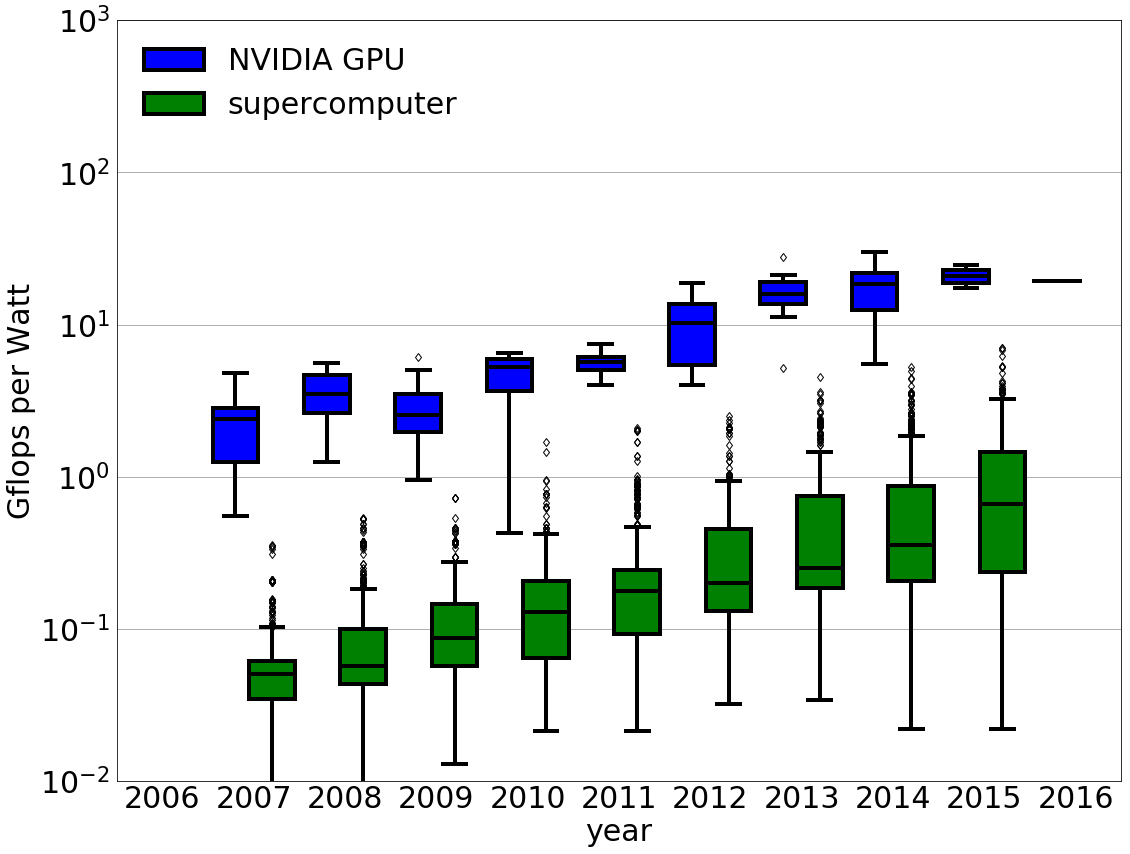

In [8]:
f, ax = plt.subplots()
n = ax.boxplot(NVGboxdat, positions = x_NVG, patch_artist=True)
s = ax.boxplot(scboxdat, positions = x_sc, patch_artist=True)


for box in n['boxes']:
    box.set( color='k', linewidth=2)
    box.set( facecolor = 'b', linewidth=4)

for whisker in n['whiskers']:
    whisker.set(color='k', linewidth=4)

for cap in n['caps']:
    cap.set(color='k', linewidth=4)

for median in n['medians']:
    median.set(color='k', linewidth=4)

for flier in n['fliers']:
    flier.set(marker='d', color='b', linewidth=4, fillstyle = 'full')
    
for box in s['boxes']:
    box.set( color='k', linewidth=2)
    box.set( facecolor = 'g', linewidth=4)

for whisker in s['whiskers']:
    whisker.set(color='k', linewidth=4)

for cap in s['caps']:
    cap.set(color='k', linewidth=4)

for median in s['medians']:
    median.set(color='k', linewidth=4)

for flier in s['fliers']:
    flier.set(marker='d', color='b', linewidth=4, fillstyle = 'full')
    

plt.xlim(2005.5, 2016.5)
plt.ylim(10**(-2), 10**3)
yrs = np.arange(2006, 2017)
plt.xticks(yrs, yrs)
ax.set_yscale('log')

ax.xaxis.set_tick_params(size=0)
plt.tick_params(axis='y', which='both', left='off')

ax.yaxis.grid(which="major", linewidth=1)

plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlabel('year', fontsize=30)
plt.ylabel('Gflops per Watt', fontsize=30)

hline = ax.axhline(10**5, color='black', linestyle = '--', linewidth = 4)

ax.legend([n["boxes"][0], s["boxes"][0], hline.get_label() ], ['NVIDIA GPU', 'supercomputer', 'Human'], loc='upper left', prop={'size': 30}, frameon = False)

f.set_size_inches(18, 14)

plt.show()